In [2]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
print(os.getcwd())

/Users/tylerlewris/Desktop/HotelBookings


In [3]:
# Read in data
df = pd.read_csv('data/hotel_bookings.csv')

### Exploratory Data Analysis

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [90]:
df.shape

(119390, 32)

In [82]:
#Check for missing values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
#Number of countries represented per hotel
df.groupby(['hotel']).country.value_counts()

hotel         country
City Hotel    PRT        30960
              FRA         8804
              DEU         6084
              GBR         5315
              ESP         4611
                         ...  
Resort Hotel  TGO            1
              TUN            1
              UGA            1
              UZB            1
              ZMB            1
Name: country, Length: 291, dtype: int64

In [25]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [36]:
#Percent of cancelations
(df['is_canceled'].sum())/(df['is_canceled'].size)*100

37.041628277075134

Text(0.5, 1.0, 'Hotel Type vs # of Cancellations')

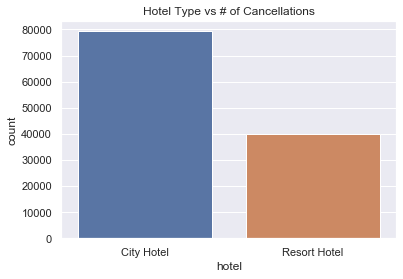

In [36]:
#Visualize hotel by type and number of cancellations
hoteltype = df.groupby('hotel').is_canceled.count().reset_index()
hoteltype.columns = ['hotel','count']
sns.set(style='darkgrid')
ax = sns.barplot(x='hotel',y='count', data=hoteltype)
ax.set_title("Hotel Type vs # of Cancellations")

In [19]:
#I think lead time represents how much time takes place between when a reservation is made and a stay/cancel happens
df.lead_time.describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Text(0.5, 1.0, 'Cancelations by Hotel and Total Lead Time')

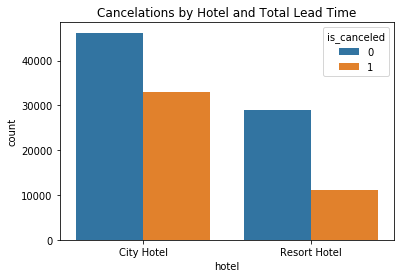

In [32]:
cancel_df = df.groupby(['hotel','is_canceled']).lead_time.count().reset_index()
cancel_df.columns = ['hotel','is_canceled','count']
ax = sns.barplot(x = 'hotel', y = 'count', hue = 'is_canceled', data = cancel_df)
ax.set_title('Cancelations by Hotel and Total Lead Time')

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: lead_time, dtype: int64